
# Employees Attrition
## Introduction
the employees attrtion data show the number of employees that are active and those that terminated.

The intent is to see if individual terminations can be predicted from the data provided.

The thing to be predicted is status of active or terminated

The data containsemployee id employee record date ( year of data) birth date hire date termination date age length of service city department job title store number gender termination reason termination type status year status business unit


In [1]:
#importing necessary libraries 
import pandas as pd
import numpy as np

print('numpy version:', np.__version__)
print('matplotlib version:', pd.__version__)
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)
from sklearn.model_selection import cross_val_score

# Allows charts to appear in the notebook
%matplotlib inline
#Loading the csv file
df_Emp = pd.read_csv("EmployeesAttrion.csv", encoding="ISO-8859-1",  sep=",",low_memory=False)

numpy version: 1.15.1
matplotlib version: 0.23.4


# Overview of Data 

In [2]:
df_Emp

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE
5,1318,12/31/2011 0:00,1/3/1954,8/28/1989,1/1/1900,57,22,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2011,ACTIVE,HEADOFFICE
6,1318,12/31/2012 0:00,1/3/1954,8/28/1989,1/1/1900,58,23,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2012,ACTIVE,HEADOFFICE
7,1318,12/31/2013 0:00,1/3/1954,8/28/1989,1/1/1900,59,24,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2013,ACTIVE,HEADOFFICE
8,1318,12/31/2014 0:00,1/3/1954,8/28/1989,1/1/1900,60,25,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2014,ACTIVE,HEADOFFICE
9,1318,12/31/2015 0:00,1/3/1954,8/28/1989,1/1/1900,61,26,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2015,ACTIVE,HEADOFFICE


In [3]:
#shape function prints the number of rows and columns 
print('Employees dataset shape: {}'.format(df_Emp.shape))
# df_Emp

Employees dataset shape: (49653, 18)


In [4]:
#shows the datatypes in our dataset
df_Emp.dtypes

EmployeeID              int64
recorddate_key         object
birthdate_key          object
orighiredate_key       object
terminationdate_key    object
age                     int64
length_of_service       int64
city_name              object
department_name        object
job_title              object
store_name              int64
gender_short           object
gender_full            object
termreason_desc        object
termtype_desc          object
STATUS_YEAR             int64
STATUS                 object
BUSINESS_UNIT          object
dtype: object

In [5]:
#gives the general overview of rangeIndex and the number of datatypes e.g int(6) that means how many numeric columns we have in our data
#and value types (null or not null)
df_Emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null object
birthdate_key          49653 non-null object
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(5), object(13)
memory usage: 6.8+ MB


In [6]:
#describes count mean min max of numeric values in our data
df_Emp.describe()


,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


# Exploratory analysis

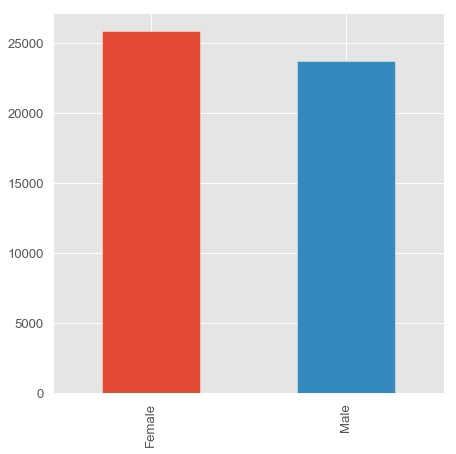

In [7]:
#male and female employees
plt.figure(figsize=[7,7])
plt.style.use("ggplot")
df_Emp['gender_full'].value_counts().plot(kind='bar')

The figure above shows the total number of male and female employees in data

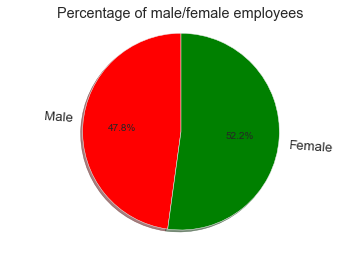

In [8]:
count_emp_male = df_Emp['gender_full'].str.count('Male')
count_emp_female = df_Emp['gender_full'].str.count('Female')

pie_values = [count_emp_male.sum(), count_emp_female.sum()]
pie_labels = 'Male', 'Female'

plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', shadow=True, startangle=90, rotatelabels=True, colors = {'red', 'green'})

plt.axis('equal')

plt.title('Percentage of male/female employees')
plt.show()

This figure shows the same amount of male and female employees in piechart

In [9]:
# #Replacing the old objects with the new optimized converted objects
# optimized_df_Emp[converted_df_Emp_obj.columns] = converted_df_Emp_obj

# #Printing the memory usage of the dataframe
# print(mem_usage(optimized_df_Emp))

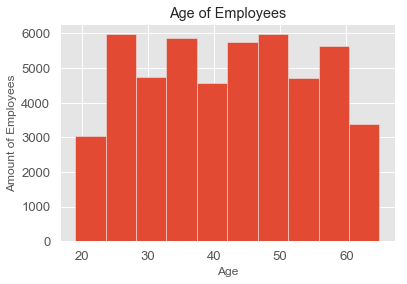

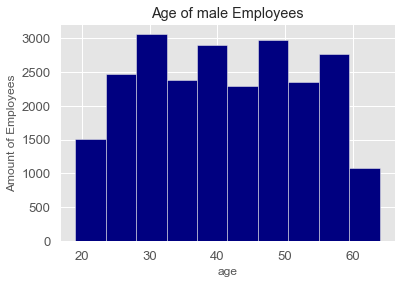

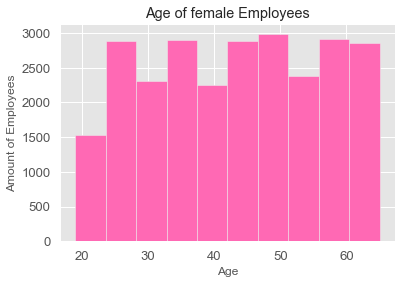

In [10]:


df_Emp['age'].hist()
plt.title('Age of Employees')
plt.xlabel('Age')
plt.ylabel('Amount of Employees')
plt.show()

df_Emp[(df_Emp['gender_full'] == 'Male')]['age'].hist(color = 'navy')
plt.title('Age of male Employees')
plt.xlabel('age')
plt.ylabel('Amount of Employees')
plt.show()

df_Emp[(df_Emp['gender_full'] == 'Female')]['age'].hist(color = 'hotpink')
plt.title('Age of female Employees')
plt.xlabel('Age')
plt.ylabel('Amount of Employees')
plt.show()

The first figure shows the age of both men and women

 second figure shows the age of male employees
 
 third figure shows the age of female employees

In [11]:
#find the counts for each department
count_per_dept=df_Emp['department_name'].value_counts()
count_per_dept

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Accounts Payable             34
Labor Relations              34
Training                     30
Audit                        24
Investment                   24
Compensation                 24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

#This counts the number of employees as per each departmen

Text(0.5,0,'Departments')

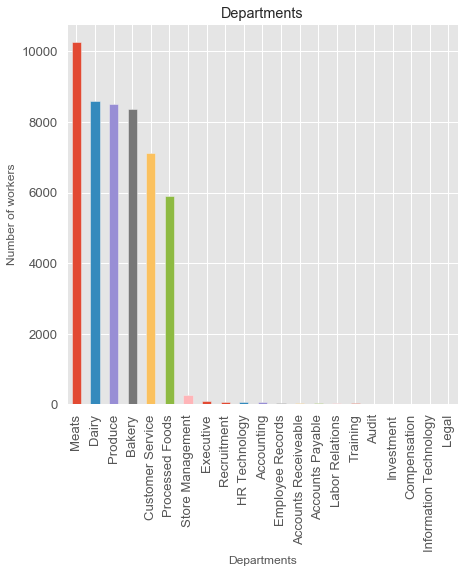

In [12]:
fig=plt.figure(figsize=[7,7])
ax=fig.gca()
count_per_dept.plot.bar(ax=ax)
ax.set_title("Departments")
ax.set_ylabel("Number of workers")
ax.set_xlabel("Departments")


the above figure count the number of employees as per each department

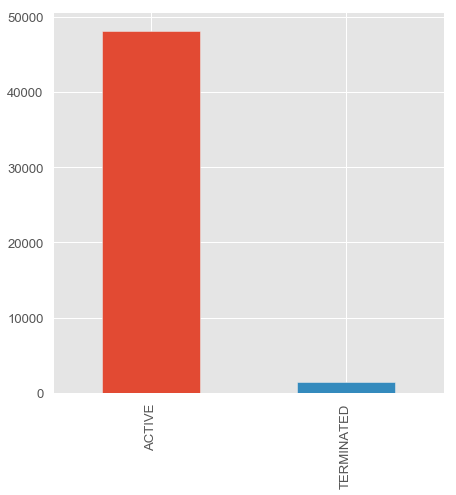

In [13]:
# df_Emp[(df_Emp['gender_full'] == 'Male')]['STATUS'].hist(color = 'navy')
# plt.title(' Status of male Employees')
# plt.xlabel('Status')
# plt.ylabel('Amount of Employees')
# plt.show()
# df_Emp['STATUS'].hist()
# plt.title('Age of Employees')
# plt.xlabel('Age')
# plt.ylabel('Amount of Employees')
# plt.show()
plt.figure(figsize=[7,7])
plt.style.use("ggplot")
df_Emp['STATUS'].value_counts().plot(kind='bar')

The figure above shows number of active and deactive employees

In [14]:
#Look at missing values
df_Emp.isnull().sum()


EmployeeID             0
recorddate_key         0
birthdate_key          0
orighiredate_key       0
terminationdate_key    0
age                    0
length_of_service      0
city_name              0
department_name        0
job_title              0
store_name             0
gender_short           0
gender_full            0
termreason_desc        0
termtype_desc          0
STATUS_YEAR            0
STATUS                 0
BUSINESS_UNIT          0
dtype: int64

no missing values are found in the data

In [15]:

# store our transformation in a new column, so the original Status isn't changed.
df_Emp['status'] = df_Emp['STATUS'].map( {'TERMINATED': 1, 'ACTIVE': 0} ).astype(int)
df_Emp.head(3)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,status
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,0
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,0
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,0


Text(0.5,0,'Reason')

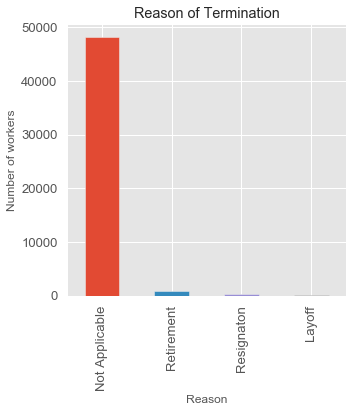

In [16]:
#find the counts for each department
count_per_dept=df_Emp['termreason_desc'].value_counts()
count_per_dept
fig=plt.figure(figsize=[5,5])
ax=fig.gca()
count_per_dept.plot.bar(ax=ax)
ax.set_title("Reason of Termination")
ax.set_ylabel("Number of workers")
ax.set_xlabel("Reason")


This figure shows the reson of termination and shows the number of employees who terminated the job as per each reason

Text(0.5,0,'TypeEmp')

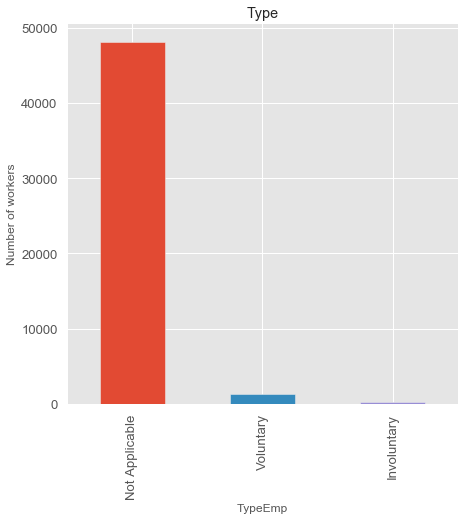

In [17]:
#find the termination type for each department
count_per_dept=df_Emp['termtype_desc'].value_counts()
count_per_dept
fig=plt.figure(figsize=[7,7])
ax=fig.gca()
count_per_dept.plot.bar(ax=ax)
ax.set_title("Type")
ax.set_ylabel("Number of workers")
ax.set_xlabel("TypeEmp")


Text(0.5,0,'Cities')

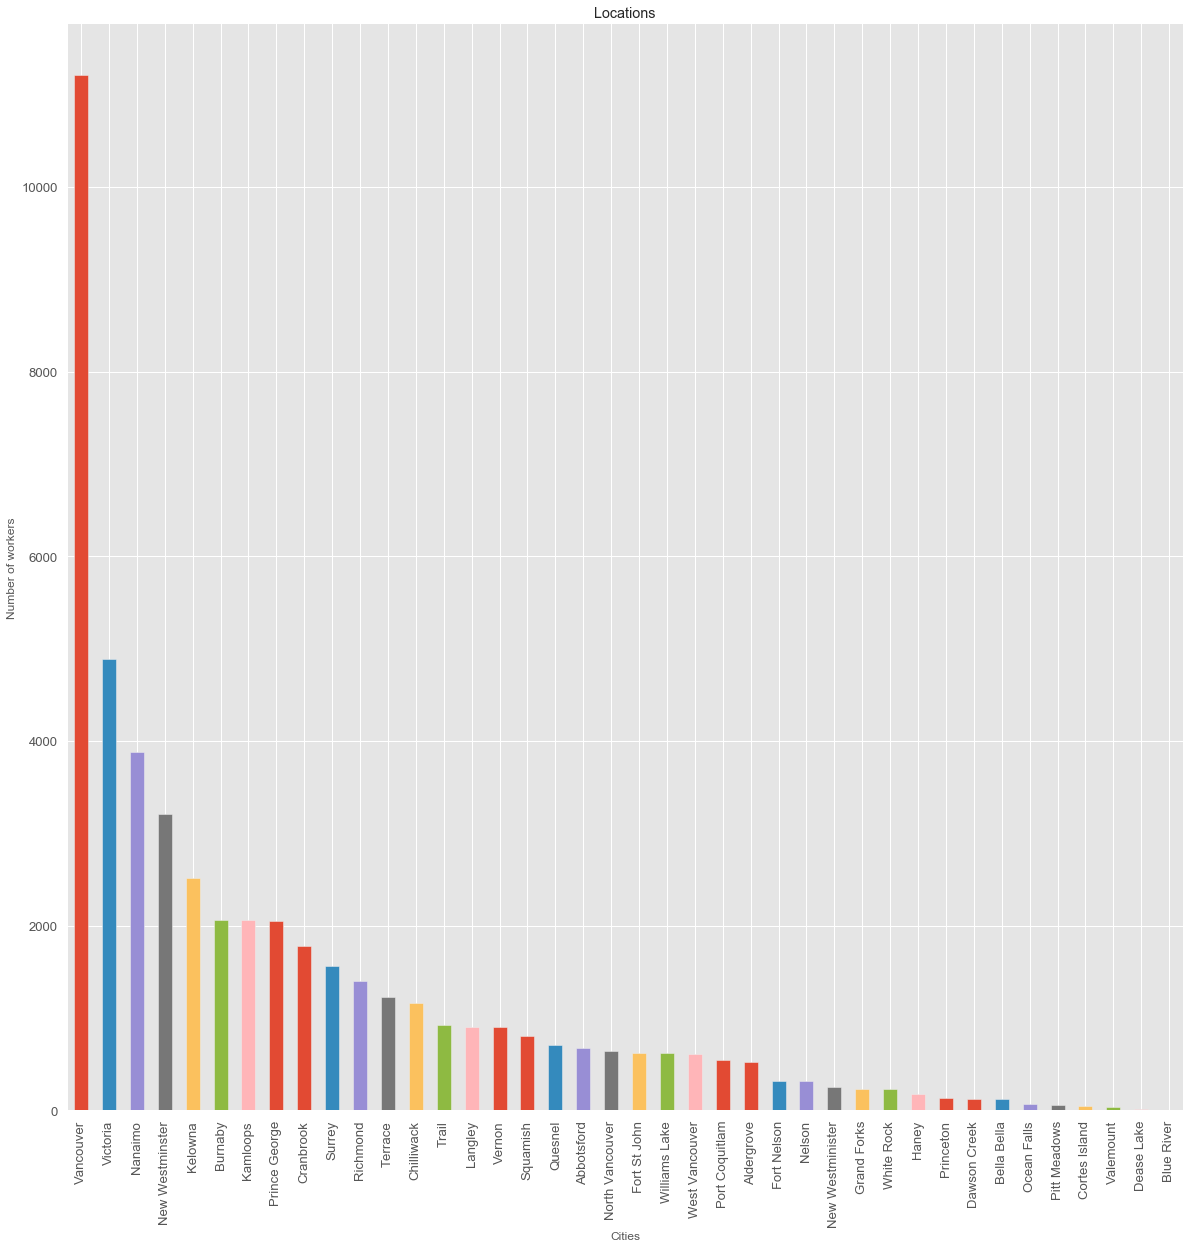

In [18]:
#find the counts for each city
count_per_dept=df_Emp['city_name'].value_counts()
count_per_dept
fig=plt.figure(figsize=[20,20])
ax=fig.gca()
count_per_dept.plot.bar(ax=ax)
ax.set_title("Locations")
ax.set_ylabel("Number of workers")
ax.set_xlabel("Cities")


this figure shows the number of employees from different cities in canada

In [19]:

df_Emp['GENDER'] = df_Emp['gender_full'].map( {'Male': 0, 'Female': 1} ).astype(int)
df_Emp.head(3)

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,status,GENDER
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,0,0
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,0,0
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,0,0


In [20]:
df_terminated_male=df_Emp[(df_Emp.GENDER == 0) & (df_Emp.STATUS == "TERMINATED") ]
df_terminated_male

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,status,GENDER
48168,1338,2/1/2009 0:00,2/16/1949,9/20/1989,2/16/2009,60,19,Vancouver,Training,"Director, Training",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48170,1340,2/1/2009 0:00,2/19/1949,9/22/1989,2/19/2009,60,19,Kelowna,Store Management,Store Manager,16,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,1,0
48171,1341,2/1/2009 0:00,2/21/1949,9/23/1989,2/21/2009,60,19,Vancouver,Labor Relations,"Director, Labor Relations",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48175,1347,3/1/2009 0:00,3/4/1949,9/29/1989,3/4/2009,60,19,Victoria,Meats,Meats Manager,37,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,1,0
48176,1351,3/1/2009 0:00,3/9/1949,10/2/1989,3/9/2009,60,19,Vancouver,Compensation,"Director, Compensation",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48178,1353,3/1/2009 0:00,3/13/1949,10/4/1989,3/13/2009,60,19,Kamloops,Store Management,Store Manager,15,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,1,0
48179,1355,3/1/2009 0:00,3/15/1949,10/5/1989,3/15/2009,60,19,Vancouver,Legal,Corporate Lawyer,35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48180,1357,3/1/2009 0:00,3/14/1949,10/5/1989,3/14/2009,60,19,Vancouver,Legal,Corporate Lawyer,35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48181,1358,3/1/2009 0:00,3/14/1949,10/5/1989,3/14/2009,60,19,Victoria,Produce,Produce Manager,37,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,1,0
48185,1363,3/1/2009 0:00,3/20/1949,10/8/1989,3/20/2009,60,19,Victoria,Bakery,Bakery Manager,37,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,1,0


In [21]:
df_terminated_Female=df_Emp[(df_Emp.GENDER == 1) & (df_Emp.STATUS == "TERMINATED") ]
df_terminated_Female

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,status,GENDER
48169,1339,2/1/2014 0:00,2/19/1949,9/22/1989,2/19/2014,65,24,Nelson,Store Management,Store Manager,19,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,1,1
48172,1343,2/1/2014 0:00,2/24/1949,9/25/1989,2/24/2014,65,24,Victoria,Store Management,Store Manager,37,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,1,1
48173,1344,2/1/2014 0:00,2/25/1949,9/25/1989,2/25/2014,65,24,Vancouver,HR Technology,"Director, HR Technology",35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1
48174,1346,3/1/2014 0:00,3/4/1949,9/29/1989,3/4/2014,65,24,Vancouver,Employee Records,"Director, Employee Records",35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1
48177,1352,3/1/2014 0:00,3/11/1949,10/3/1989,3/11/2014,65,24,Vancouver,Legal,Corporate Lawyer,35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1
48182,1359,3/1/2014 0:00,3/16/1949,10/6/1989,3/16/2014,65,24,Nanaimo,Meats,Meats Manager,18,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,1,1
48183,1360,3/1/2014 0:00,3/17/1949,10/6/1989,3/17/2014,65,24,Vancouver,Accounts Receiveable,"Director, Accounts Receivable",35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1
48184,1362,3/1/2014 0:00,3/18/1949,10/7/1989,3/18/2014,65,24,Kamloops,Meats,Meats Manager,15,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,1,1
48186,1365,9/1/2012 0:00,3/24/1949,10/10/1989,9/26/2012,63,22,Fort St John,Store Management,Store Manager,12,F,Female,Resignaton,Voluntary,2012,TERMINATED,STORES,1,1
48189,1370,4/1/2014 0:00,4/1/1949,10/14/1989,4/1/2014,65,24,Vancouver,Accounts Payable,"Director, Accounts Payable",35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1


In [22]:
#More females terminated the job

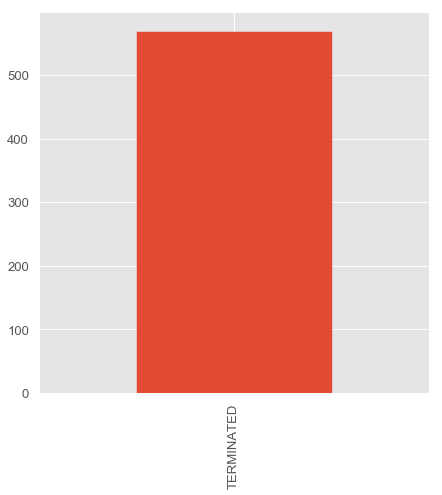

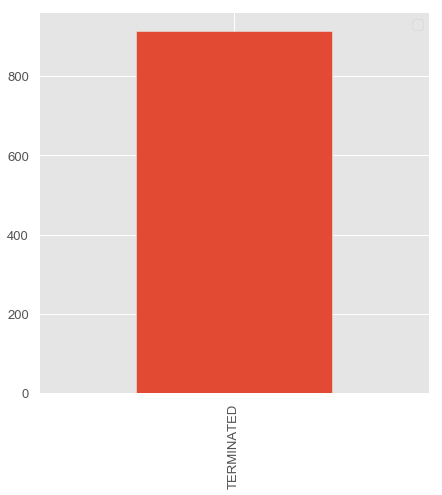

In [23]:
plt.figure(figsize=[7,7])
plt.style.use("ggplot")
df_terminated_male['STATUS'].value_counts().plot(kind='bar')

plt.figure(figsize=[7,7])
plt.legend("female")
plt.style.use("ggplot")
df_terminated_Female['STATUS'].value_counts().plot(kind='bar')


 First figure shows the number of males who terminated the job 

second figure shows the number of females who terminated the job

more females terminated the job

In [24]:
df_stores_unit=df_Emp[(df_Emp.GENDER == 1) & (df_Emp.BUSINESS_UNIT == "STORES") ]


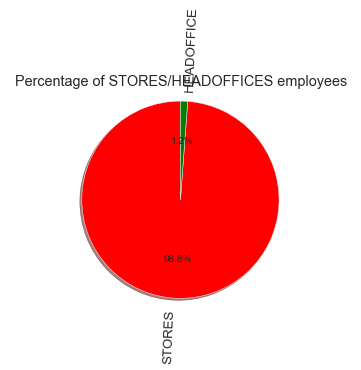

In [25]:
count_emp_male = df_Emp['BUSINESS_UNIT'].str.count('STORES')
count_emp_female = df_Emp['BUSINESS_UNIT'].str.count('HEADOFFICE')

pie_values = [count_emp_male.sum(), count_emp_female.sum()]
pie_labels = 'STORES', 'HEADOFFICE'

plt.pie(pie_values, labels=pie_labels, autopct='%1.1f%%', shadow=True, startangle=90, rotatelabels=True, colors = {'red', 'green'})

plt.axis('equal')

plt.title('Percentage of STORES/HEADOFFICES employees')
plt.show()

#percentage of employees who work in stores and headOffices
#98% employees work in stores

In [26]:
df_term=df_Emp[(df_Emp.age>20) & (df_Emp.STATUS == "TERMINATED") ]

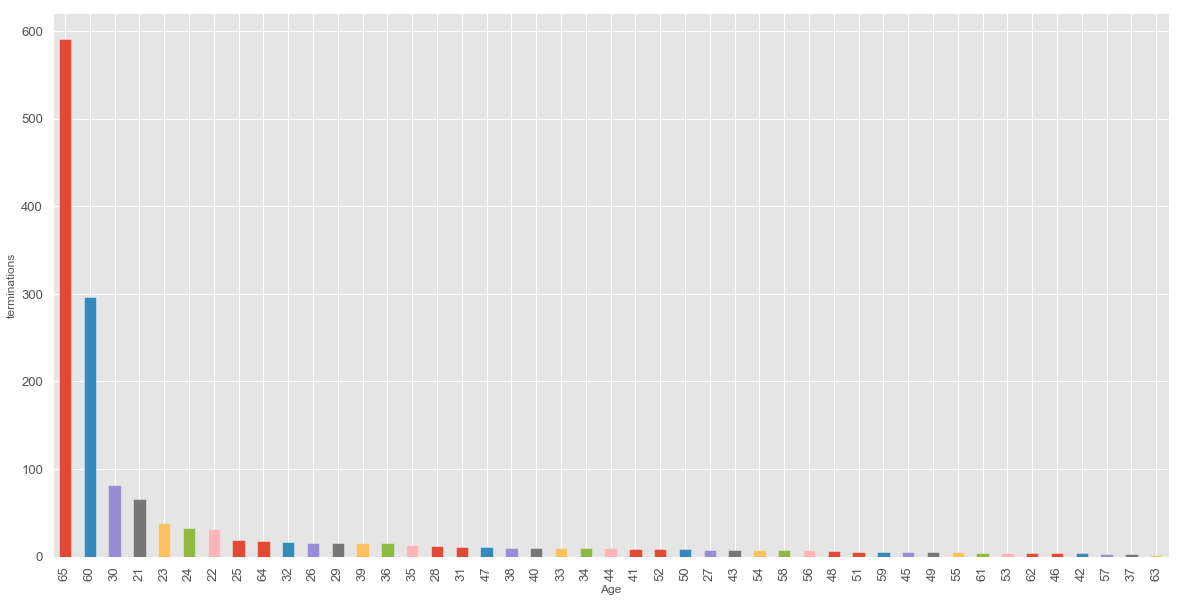

In [27]:
#calculate the terminated status of the people by age
plt.figure(figsize=[20,10])
plt.style.use("ggplot")
plt.xlabel("Age")
plt.ylabel("terminations")
df_term['age'].value_counts().plot(kind='bar')

# fig=plt.figure(figsize=[20,20])
# ax=fig.gca()
# df_term.plot.bar(ax=ax)
# ax.set_ylabel("Number of workers")
# ax.set_xlabel("ages")

Show the number of termination according to employees age

In [28]:
# df_jobs=df_Emp[(df_Emp.age>20) & (df_Emp.job_title == "TERMINATED") ]
df_jobs=df_Emp.loc[:,['age','STATUS','job_title']]
df_jobs

,age,STATUS,job_title
0,52,ACTIVE,CEO
1,53,ACTIVE,CEO
2,54,ACTIVE,CEO
3,55,ACTIVE,CEO
4,56,ACTIVE,CEO
5,57,ACTIVE,CEO
6,58,ACTIVE,CEO
7,59,ACTIVE,CEO
8,60,ACTIVE,CEO
9,61,ACTIVE,CEO


In [29]:
# df_cashiers = df_Emp[df_Emp['job_title'] == 'Cashier']
# # print(df_cashiers)
# plt.figure(figsize=[20,20])

# plt.subplot(1,2,1)
# plt.scatter(df_cashiers.STATUS,df_cashiers.age )

Text(0.5,0,'Termination per year')

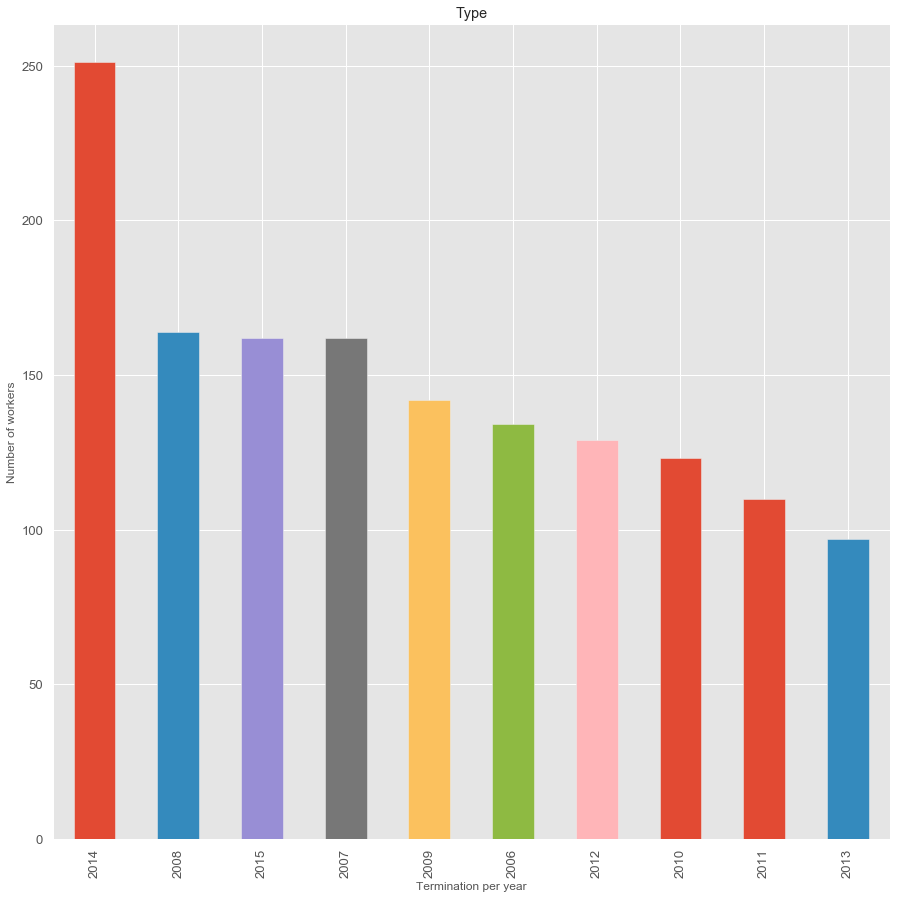

In [30]:
# look at number of terminations per year.
# Count terminations per year
df_term_per_year=df_Emp[(df_Emp.age>=20) & (df_Emp.STATUS == "TERMINATED")& (df_Emp.STATUS_YEAR) ]
df_term_per_year
count_per_yr=df_term['STATUS_YEAR'].value_counts()
fig=plt.figure(figsize=[15,15])
ax=fig.gca()
count_per_yr.plot.bar(ax=ax)
ax.set_title("Type")
ax.set_ylabel("Number of workers")
ax.set_xlabel("Termination per year")




#This figures shows the number of terminations per year. Terminations are increasing over time

In [31]:
#check the people who are over 20 years of age and terminated their job 
df_term=df_Emp[(df_Emp.age>=20) & (df_Emp.STATUS == "TERMINATED")& (df_Emp.termreason_desc)& (df_Emp.job_title) ]
df_term

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,status,GENDER
48168,1338,2/1/2009 0:00,2/16/1949,9/20/1989,2/16/2009,60,19,Vancouver,Training,"Director, Training",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48169,1339,2/1/2014 0:00,2/19/1949,9/22/1989,2/19/2014,65,24,Nelson,Store Management,Store Manager,19,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,1,1
48170,1340,2/1/2009 0:00,2/19/1949,9/22/1989,2/19/2009,60,19,Kelowna,Store Management,Store Manager,16,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,1,0
48171,1341,2/1/2009 0:00,2/21/1949,9/23/1989,2/21/2009,60,19,Vancouver,Labor Relations,"Director, Labor Relations",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48172,1343,2/1/2014 0:00,2/24/1949,9/25/1989,2/24/2014,65,24,Victoria,Store Management,Store Manager,37,F,Female,Retirement,Voluntary,2014,TERMINATED,STORES,1,1
48173,1344,2/1/2014 0:00,2/25/1949,9/25/1989,2/25/2014,65,24,Vancouver,HR Technology,"Director, HR Technology",35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1
48174,1346,3/1/2014 0:00,3/4/1949,9/29/1989,3/4/2014,65,24,Vancouver,Employee Records,"Director, Employee Records",35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1
48175,1347,3/1/2009 0:00,3/4/1949,9/29/1989,3/4/2009,60,19,Victoria,Meats,Meats Manager,37,M,Male,Retirement,Voluntary,2009,TERMINATED,STORES,1,0
48176,1351,3/1/2009 0:00,3/9/1949,10/2/1989,3/9/2009,60,19,Vancouver,Compensation,"Director, Compensation",35,M,Male,Retirement,Voluntary,2009,TERMINATED,HEADOFFICE,1,0
48177,1352,3/1/2014 0:00,3/11/1949,10/3/1989,3/11/2014,65,24,Vancouver,Legal,Corporate Lawyer,35,F,Female,Retirement,Voluntary,2014,TERMINATED,HEADOFFICE,1,1


#in total 1474 have terminated the job 
#by age 60+ have been retired
#by job_title young people are resigning cashier job in the department of customer service

In [32]:

count_per_dept=df_term['job_title'].value_counts().sum()
count_per_dept

1480

Text(0.5,0,'TypeEmp')

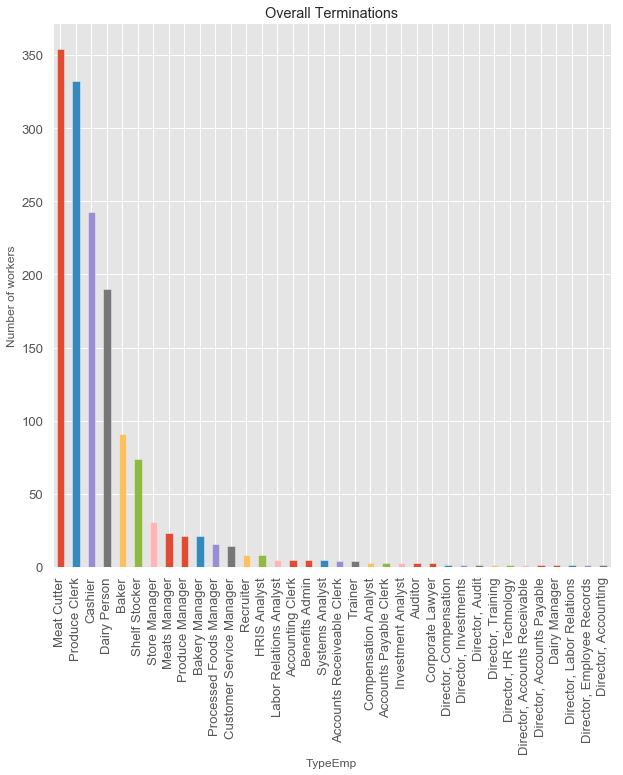

In [33]:
#find the counts for each terminated job
count_per_dept=df_term['job_title'].value_counts()
count_per_dept
fig=plt.figure(figsize=[10,10])
ax=fig.gca()
count_per_dept.plot.bar(ax=ax)
ax.set_title("Overall Terminations")
ax.set_ylabel("Number of workers")
ax.set_xlabel("TypeEmp")


The figure above show the number of termination as per each job titile overall

In [34]:
#Resignationss
df_resg=df_Emp[(df_Emp.age>=20) & (df_Emp.STATUS == "TERMINATED")& (df_Emp.termreason_desc=="Resignaton")& (df_Emp.job_title) ]
df_resg

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,status,GENDER
48186,1365,9/1/2012 0:00,3/24/1949,10/10/1989,9/26/2012,63,22,Fort St John,Store Management,Store Manager,12,F,Female,Resignaton,Voluntary,2012,TERMINATED,STORES,1,1
48265,1484,7/1/2007 0:00,11/22/1949,2/15/1990,7/25/2007,57,17,Vancouver,HR Technology,HRIS Analyst,35,M,Male,Resignaton,Voluntary,2007,TERMINATED,HEADOFFICE,1,0
48354,1624,3/1/2011 0:00,8/3/1950,6/29/1990,3/26/2011,60,20,Vancouver,Dairy,Dairy Person,41,F,Female,Resignaton,Voluntary,2011,TERMINATED,STORES,1,1
48372,1653,10/1/2011 0:00,10/12/1950,8/5/1990,10/31/2011,61,21,Prince George,Processed Foods,Processed Foods Manager,26,F,Female,Resignaton,Voluntary,2011,TERMINATED,STORES,1,1
48395,1714,10/1/2007 0:00,1/30/1951,10/2/1990,10/11/2007,56,17,Fort St John,Dairy,Dairy Person,12,M,Male,Resignaton,Voluntary,2007,TERMINATED,STORES,1,0
48409,1823,4/1/2007 0:00,10/6/1951,2/11/1991,4/22/2007,55,16,Nanaimo,Meats,Meat Cutter,18,M,Male,Resignaton,Voluntary,2007,TERMINATED,STORES,1,0
48411,1885,1/1/2012 0:00,2/7/1952,4/17/1991,1/10/2012,59,20,Vancouver,Meats,Meat Cutter,41,F,Female,Resignaton,Voluntary,2012,TERMINATED,STORES,1,1
48415,1951,9/1/2006 0:00,7/5/1952,7/5/1991,9/16/2006,54,15,Kelowna,Meats,Meat Cutter,16,M,Male,Resignaton,Voluntary,2006,TERMINATED,STORES,1,0
48416,1998,3/1/2009 0:00,9/21/1952,8/15/1991,3/6/2009,56,17,Burnaby,Meats,Meat Cutter,5,F,Female,Resignaton,Voluntary,2009,TERMINATED,STORES,1,1
48420,2127,9/1/2011 0:00,6/25/1953,1/9/1992,9/19/2011,58,19,Victoria,Meats,Meat Cutter,46,F,Female,Resignaton,Voluntary,2011,TERMINATED,STORES,1,1


Text(0.5,0,'TypeEmp')

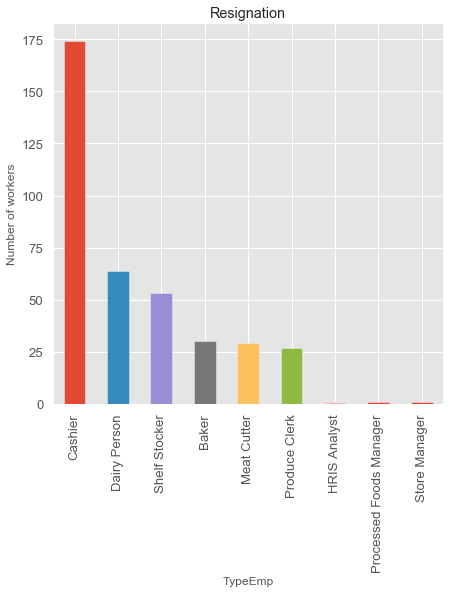

In [35]:
count_per_job=df_resg['job_title'].value_counts()
fig=plt.figure(figsize=[7,7])
ax=fig.gca()
count_per_job.plot.bar(ax=ax)
ax.set_title("Resignation")
ax.set_ylabel("Number of workers")
ax.set_xlabel("TypeEmp")

The above figure shows the number of terminations as per each job_title whose termination reason was resignation

# Decsion tree

In [36]:
df_Emp['GENDER'] = df_Emp['gender_full'].map( {'Male': 1, 'Female': 0} ).astype(int)

In [37]:
Emp_X = df_Emp[['age','GENDER','length_of_service']]
#titanic_X = df_titanic[['AgeFill','Gender']]
Emp_y = df_Emp['STATUS']

In [38]:
Emp_X.head()

,age,GENDER,length_of_service
0,52,1,17
1,53,1,18
2,54,1,19
3,55,1,20
4,56,1,21


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
 #splits the data into training and test 
X_train, X_test, y_train, y_test = train_test_split(Emp_X,Emp_y, test_size=0.2)  
#prints the shape of training and test data and adding cross validation
kf = KFold(n_splits=10,random_state=0)
kf.get_n_splits(X_train,y_train) 
print(kf)
print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

KFold(n_splits=10, random_state=0, shuffle=False)
Train shape: (39722, 3) (39722,)
Test shape: (9931, 3) (9931,)


In [40]:
from sklearn import tree
from sklearn import metrics

## Your code ...
clf=tree.DecisionTreeClassifier(criterion = "entropy", min_samples_split = 5, max_depth =10 ,random_state=0)
clf.fit(X_train,y_train)



DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [41]:
predictions = clf.predict(X_test)
metrics.accuracy_score(y_test,predictions)

0.9859027288289195

In [42]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn import metrics
CM = confusion_matrix(y_test,predictions)
CM
# df_cm = pd.DataFrame(CM, index = [i for i in np.unique(titanic_y)],
#                   columns = [i for i in np.unique(titanic_y)])


array([[9629,    1],
       [ 139,  162]], dtype=int64)

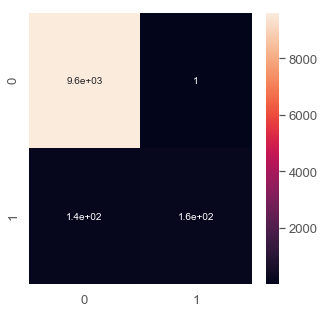

In [43]:
plt.figure(figsize = (5,5))

sn.heatmap(CM, annot=True)

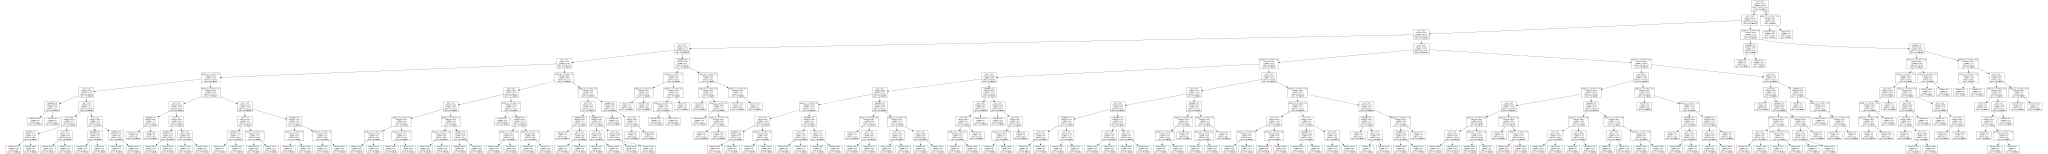

In [44]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file =None, feature_names = ['age','GENDER','length_of_service'],
                                           class_names = ['Terminated', 'Activated'])
graph = graphviz.Source(dot_data)
graph


In [45]:
##Adding cross validation 

In [46]:
from sklearn.model_selection import cross_val_score
ac=cross_val_score(estimator=clf,X=X_train,y=y_train,cv=10)
ac

array([0.98590486, 0.98464636, 0.98867355, 0.98741505, 0.98766365,
       0.9846425 , 0.98892246, 0.98791541, 0.98866784, 0.98942332])

In [47]:
ac.mean()

0.9873874987749784

In [48]:
# sns.lmplot('length_of_service', 'age', data=df_Emp, hue='STATUS',
#            palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [49]:
df_Emp.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT,status,GENDER
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE,0,1
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE,0,1
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE,0,1
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE,0,1
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE,0,1


# SVM 

In [50]:
SvmY = np.array(df_Emp[['status']])
SvmX = np.array(df_Emp.drop(['EmployeeID','recorddate_key','birthdate_key','orighiredate_key','terminationdate_key','city_name','department_name','job_title','store_name','gender_short','gender_full','termreason_desc','termtype_desc','STATUS','BUSINESS_UNIT','status','GENDER'], axis=1))


In [51]:
SvmX
# SvmY

array([[  52,   17, 2006],
       [  53,   18, 2007],
       [  54,   19, 2008],
       ...,
       [  21,    2, 2015],
       [  19,    0, 2013],
       [  20,    1, 2014]], dtype=int64)

In [52]:
#Split Data
from sklearn.model_selection import train_test_split

SvmX_train, SvmX_test, SvmY_train, SvmY_test = train_test_split(SvmX,SvmY, test_size=0.20, stratify=SvmY)
#prints the shape of training and test data and adding cross validation
kfs = KFold(n_splits=10,random_state=0)
kfs.get_n_splits(SvmX_train,SvmY_train) 
print(kfs)
print('Train shape:', SvmX_train.shape, SvmY_train.shape)
print('Test shape:', SvmX_test.shape, SvmY_test.shape)


KFold(n_splits=10, random_state=0, shuffle=False)
Train shape: (39722, 3) (39722, 1)
Test shape: (9931, 3) (9931, 1)


In [53]:
#adding svm and fitting kernel svm to the training set
from sklearn.svm import SVC
classifier=svm.SVC(kernel='rbf',random_state=0)
#classifier.fit(x,y.ravel())
classifier.fit(SvmX_train,SvmY_train.ravel())


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
#predicting the test_Set results
pred=classifier.predict(SvmX_test)
pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
metrics.accuracy_score(SvmY_test,pred)

0.9828818850065452

In [56]:
from sklearn.metrics import f1_score
F1=f1_score(SvmY_test,pred)
F1


0.6458333333333334

In [57]:
#confusion matrix
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(SvmY_test,pred)
con_mat

array([[9606,   28],
       [ 142,  155]], dtype=int64)

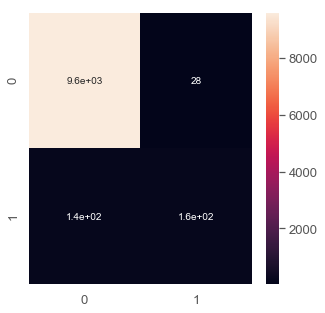

In [58]:
plt.figure(figsize = (5,5))
sn.heatmap(con_mat, annot=True)

In [59]:
#Applying k_fold cross validation
from sklearn.model_selection import cross_val_score
K_FOLD=cross_val_score(estimator=classifier,X=X_train,y=y_train.ravel(),cv=10)
K_FOLD

array([0.98590486, 0.98464636, 0.98867355, 0.98716335, 0.98766365,
       0.9846425 , 0.98867069, 0.98791541, 0.98866784, 0.98942332])

In [60]:
K_FOLD.mean()

0.9873371526445396

In [61]:
# from sklearn.metrics import f1_score
# print(f1_score(SvmY_test,pred))

# knn

In [62]:
# Separate the label from the dataset
KnnY = df_Emp.status
KnnX=np.array(df_Emp.drop(['EmployeeID','recorddate_key','birthdate_key','orighiredate_key','terminationdate_key','city_name','department_name','job_title','store_name','gender_short','gender_full','termreason_desc','termtype_desc','STATUS','BUSINESS_UNIT','status'], axis=1))

KnnX
# Emp_X = df_Emp[['age','GENDER','length_of_service']]
# #titanic_X = df_titanic[['AgeFill','Gender']]
# Emp_y = df_Emp['STATUS']

array([[  52,   17, 2006,    1],
       [  53,   18, 2007,    1],
       [  54,   19, 2008,    1],
       ...,
       [  21,    2, 2015,    0],
       [  19,    0, 2013,    0],
       [  20,    1, 2014,    0]], dtype=int64)

In [63]:
#split data into trainnig and test although above defined training and test data can be used 
KnnX_train, KnnX_test, Knny_train, Knny_test = train_test_split(KnnX, KnnY, test_size=0.2,
                                                    random_state=0)
#prints the shape of training and test data and adding cross validation
kf = KFold(n_splits=10,random_state=0)
kf.get_n_splits(KnnX_train,Knny_train) 
print(kf)
print('Train shape:', KnnX_train.shape, Knny_train.shape)
print('Test shape:', KnnX_test.shape, Knny_test.shape)



KFold(n_splits=10, random_state=0, shuffle=False)
Train shape: (39722, 4) (39722,)
Test shape: (9931, 4) (9931,)


In [64]:
# from sklearn.preprocessing import StandardScaler
# sc_x=StandardScaler()
# # sc_x
# #normalizing data but it should be ok not to normalize only age and length of service have double values
# #TRAINING AND test set is defined above
# X_train=sc_x.fit_transform(X_train)
# y_train=sc_x.fit_transform(y_train)


In [88]:
from sklearn.neighbors import KNeighborsClassifier
# k_range = list(range(1, 31))
Knnmodel = KNeighborsClassifier(n_neighbors=5, p=2,weights='uniform')
Knnmodel.fit(KnnX_train, Knny_train)
score = Knnmodel.score(KnnX_test, Knny_test)
score


0.9885207934749773

In [66]:
KnnPred=Knnmodel.predict(KnnX_test)
KnnPred

array([0, 0, 0, ..., 0, 0, 0])

In [102]:
#f1 score defines the balance betweeen precision and recall
from sklearn.metrics import f1_score
F1=f1_score(Knny_test,KnnPred)
F1


0.7857142857142857

In [68]:
Knn_matrix=confusion_matrix(Knny_test,KnnPred)
Knn_matrix

array([[9608,   19],
       [  95,  209]], dtype=int64)

In [98]:
# # search for an optimal value of K for KNN
# k_range = list(range(1, 31))
# k_scores = []
# for k in k_range:
#     Knnmodel = KNeighborsClassifier(n_neighbors=k)
#     scores = cross_val_score(Knnmodel, KnnX, KnnY, cv=10, scoring='accuracy')
#     k_scores.append(scores.mean())
# print(k_scores)

In [99]:
# scores.mean()

# Adding grid search 
Allows you to define a grid of parameters that will be searched using K-fold cross-validation

In [70]:
from sklearn.model_selection import GridSearchCV


In [71]:
# define the parameter values 
k_range = list(range(1, 31))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [72]:
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}


In [73]:
# instantiate the grid
grid = GridSearchCV(Knnmodel, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [74]:
# fit the grid with data
grid.fit(KnnX,KnnY)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [75]:
 #view the results
pd.DataFrame(grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.629912,0.215401,{'n_neighbors': 1}
1,0.766943,0.204758,{'n_neighbors': 2}
2,0.758021,0.203824,{'n_neighbors': 3}
3,0.831853,0.187345,{'n_neighbors': 4}
4,0.826335,0.186487,{'n_neighbors': 5}
5,0.867923,0.168005,{'n_neighbors': 6}
6,0.867601,0.167874,{'n_neighbors': 7}
7,0.887278,0.163781,{'n_neighbors': 8}
8,0.885667,0.163215,{'n_neighbors': 9}
9,0.900912,0.155122,{'n_neighbors': 10}


In [76]:
# lets Check the best model
print(grid.best_score_)
print(grid.best_params_)

0.9164199544841198
{'n_neighbors': 20}


In [100]:
# using the best parameters
knn = KNeighborsClassifier(n_neighbors=20, weights='uniform')
knn.fit(KnnX, KnnY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=20, p=2,
           weights='uniform')

In [101]:
KnPred=knn.predict(KnnX_test)
KnPred

array([0, 0, 0, ..., 0, 0, 0])

In [103]:
Knn_mat=confusion_matrix(Knny_test,KnPred)
Knn_mat

array([[9609,   18],
       [  97,  207]], dtype=int64)

# Linear Regression

In [77]:
from sklearn.linear_model import LinearRegression
#import libraries from sklearn for linear refgression

In [78]:
regY = df_Emp.length_of_service
regX=np.array(df_Emp.drop(['EmployeeID','recorddate_key','birthdate_key','orighiredate_key','terminationdate_key','length_of_service','city_name','department_name','job_title','store_name','gender_short','gender_full','termreason_desc','termtype_desc','STATUS_YEAR','STATUS','BUSINESS_UNIT','status','GENDER'], axis=1))

regX
# regX = df_Emp.iloc[:,:-4]

# regY=df_Emp.iloc[:,18]

# regX

array([[52],
       [53],
       [54],
       ...,
       [21],
       [19],
       [20]], dtype=int64)

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
 #splits the data into training and test 
regX_train, regX_test, regy_train, regy_test = train_test_split(regX,regY, test_size=0.2)  
#prints the shape of training and test data and adding cross validation
regkf = KFold(n_splits=10,random_state=0)
regkf.get_n_splits(regX_train,regy_train) 
print(kf)
print('Train shape:', regX_train.shape, regy_train.shape)
print('Test shape:', regX_test.shape, regy_test.shape)

KFold(n_splits=10, random_state=0, shuffle=False)
Train shape: (39722, 1) (39722,)
Test shape: (9931, 1) (9931,)


In [80]:
linReg=LinearRegression()
linReg.fit(regX_train,regy_train.ravel())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [81]:
#predicting the test results
RegPred=linReg.predict(regX_test)
RegPred

array([ 5.77370692,  4.38435991, 10.8679793 , ..., 18.27783003,
       14.57290467,  1.60566589])

In [82]:
#calculating the coefficent
print(linReg.coef_)

[0.46311567]


In [83]:
#calculating the intercept
print(linReg.intercept_)

-9.045994539060253


In [84]:
from sklearn.metrics import r2_score
R2Score=r2_score(regy_test,RegPred)
R2Score

0.8285558147475068

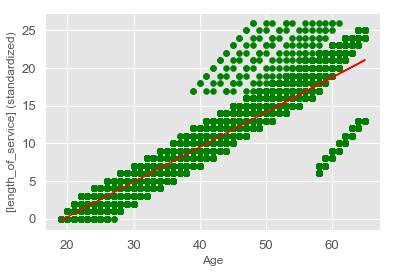

In [85]:
def lin_regplot(regX, regY, linReg):
    plt.scatter(regX, regY, c='green')
    plt.plot(regX, linReg.predict(regX), color='red')    
    return None
lin_regplot(regX, regY, linReg)
plt.xlabel('Age')
plt.ylabel('[length_of_service] (standardized)')
plt.show()

# End